In [5]:
##Import bibliotecas 
import rasterio as rio 
from rasterio.plot import show
import pandas as pd
import matplotlib.pyplot as plt

import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Circle, Rectangle
from matplotlib_scalebar.scalebar import ScaleBar

In [6]:
##Abrir nossa imagem 

##Precisaremos conectar nosso drive
filename = "D:/QSWAT/Example_UNSCH/srtm/srtm_22_15.tif"
raster = rio.open(filename)

In [7]:
##Verificando os metadados
raster.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 6000,
 'height': 6000,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0008333333333333334, 0.0, -75.0,
        0.0, -0.0008333333333333334, -10.0)}

In [8]:
##Obter os dados do raster e as informações de sua extensão:
data = raster.read(1)
extent = raster.bounds

In [9]:
with rasterio.open('D:/QSWAT/Example_UNSCH/srtm/srtm_22_15.tif') as src:
    data = src.read(1)

# Cargar el archivo shapefile con geopandas
# Reemplaza 'ruta_del_shapefile.shp' con la ruta de tu archivo shapefile
shp_file = 'D:/T_JONA/TESIS_PISCO/cachi_wg84_R.shp'

In [10]:
import os
import matplotlib
# create folders
study_area = 'Cachi'

#results_dir = os.path.join(os.getcwd(), 'results_{}'.format(study_area)) 
plots_dir = os.path.join(os.getcwd(),'plots_{}'.format(study_area))

for folder in [plots_dir]: #for folder in [results_dir, plots_dir]:
    if not os.path.isdir(folder):
        os.mkdir(folder)
        print(folder)

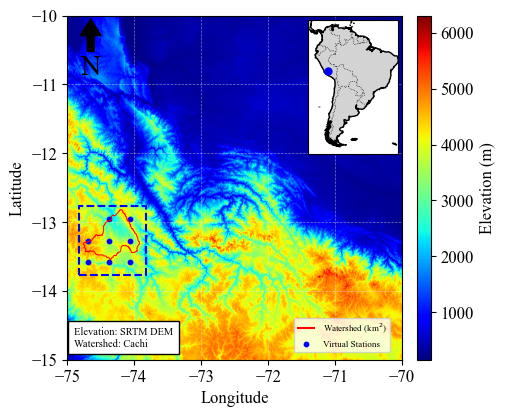

In [11]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Circle, Rectangle
from matplotlib_scalebar.scalebar import ScaleBar
import cartopy.feature as cfeature


from matplotlib import rcParams as rc
rc['font.family'] = 'serif'
rc['font.serif'] = ['Times New Roman']
rc['font.size'] = 12
rc['text.usetex'] = False

# Cargar los datos del raster con rasterio
# Reemplaza 'ruta_del_archivo.tif' con la ruta de tu archivo raster
with rasterio.open('D:/QSWAT/Example_UNSCH/srtm/srtm_22_15.tif') as src:
    data = src.read(1)
    transform = src.transform  # Guardamos la transformación para usarla después

# Cargar el archivo shapefile con geopandas
# Reemplaza 'ruta_del_shapefile.shp' con la ruta de tu archivo shapefile
shp_file = 'D:/T_JONA/TESIS_PISCO/cachi_wg84_R.shp'
#D:\T_JONA\TESIS_PISCO\point_dem84.shp
#shp_file1 = 'D:/T_JONA/TESIS_PISCO/estac_clima84.shp'
gdf = gpd.read_file(shp_file)
#gdf1 = gpd.read_file(shp_file1)
# Reproyectar el shapefile para que coincida con el sistema de coordenadas del raster
gdf = gdf.to_crs(src.crs)
#gdf1 = gdf1.to_crs(src.crs)

# Cargar el segundo shapefile
shp_file2 = 'D:/T_JONA/red_amazonas/point_station.geojson'  # Reemplaza con la ruta de tu segundo shapefile
gdf2 = gpd.read_file(shp_file2)
gdf2 = gdf2.to_crs(src.crs)

# Plotar o gráfico com a escala "terrain"
fig, ax = plt.subplots(1, 1, figsize=(9.47, 4.47))

# Plotar o raster com o rasterio.show() e integração com o plt
img = plt.imshow(data, cmap="jet", extent=(src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top))

# Plotar el raster con el rasterio.show() y la integración con el plt
#plt.colorbar(img, label="Elevation (m)", location='left', pad=0.05,aspect=35)#, agregar esala shrink=0.7

# Plotar el shapefile en el mismo gráfico
gdf.boundary.plot(ax=ax, color='red', linewidth=.7, label=r'Watershed (km$^2$)')
gdf2.plot(ax=ax, color='blue', marker='o', markersize=10, label='Virtual Stations')
#ax.legend(loc='lower center', bbox_to_anchor=(0.82, 0.01), ncol=1, fontsize='6.5')
legend = ax.legend(loc='lower center', bbox_to_anchor=(0.82, 0.01), ncol=1, fontsize='6.5')
for line in legend.get_lines():
    line.set_linewidth(1.5)

# Calcular el centro y tamaño del cuadrado
cuadrado_centro = (-74.33, -13.27)  # Latitud, longitud
cuadrado_lado = 1.0  # Tamaño del cuadrado en grados

# Agregar un cuadrado en una posición específica
square = Rectangle((cuadrado_centro[0] - cuadrado_lado/2, cuadrado_centro[1] - cuadrado_lado/2),cuadrado_lado, 
                   cuadrado_lado, color='blue', fill=False, linestyle='dashed', linewidth=1.5)
ax.add_patch(square)

# Personalizar rótulos e título do gráfico
plt.xlabel('Longitude') #xlable which is long
plt.ylabel('Latitude') #ylable which is lat
plt.title("")

#scalebar
# Modificando el scalebar para kilómetros
#scalebar = ScaleBar(0.8 * 0.001, "km", dimension="si-length", length_fraction=0.10, location="lower right")
#ax.add_artist(scalebar)

# Inserindo grids
ax.grid(color='0.95', linestyle='dashed', linewidth=0.5, alpha=0.5)

# Calcular los límites del shapefile
shp_min_lon, shp_min_lat, shp_max_lon, shp_max_lat = gdf.bounds.iloc[0]

# Plotar box de informações
info_box_text = ('Elevation: SRTM DEM\n'
                 'Watershed: Cachi')
ax.text(0.02, 0.039, info_box_text, transform=ax.transAxes, fontsize=7.5, bbox=dict(facecolor='white'))

# Vamos adicionar o norte
x, y, arrow_length = 0.07, 0.99, 0.14
# Usando uma anotação de x e y
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

# Añadir el mapa de América del Sur como un inserto
#ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper left',
                      #axes_class=plt.Axes, borderpad=1)
ax_inset = plt.axes([0.12, 0.57, 1.01, 0.3], projection=ccrs.PlateCarree())
ax_inset.set_extent([-85, -35, -60, 15], crs=ccrs.PlateCarree())  # Extensión de América del Sur
ax_inset.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax_inset.add_feature(cfeature.COASTLINE)
ax_inset.add_feature(cfeature.LAND, color='lightgray')

# Añadir límites de la cuenca en el inserto
#gdf.boundary.plot(ax=ax_inset, transform=ccrs.PlateCarree(), color='red', linewidth=1)

# Añadir una marca de localización en el inserto
ax_inset.plot(cuadrado_centro[0], cuadrado_centro[1], 'bo', markersize=5, transform=ccrs.PlateCarree())



from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.1)
cbar = plt.colorbar(img, cax=cax)
cbar.set_label('Elevation (m)')
    

# Salvando a figura como jpeg
#plt.savefig('D:/A/Mapa de Elevación con Shapefile.jpg', dpi=300, bbox_inches='tight')
#os.path.join(plots_dir, 'Mapa de Elevación con Shapefile.jpg')
# Mostrar el gráfico en pantalla

plt.show()

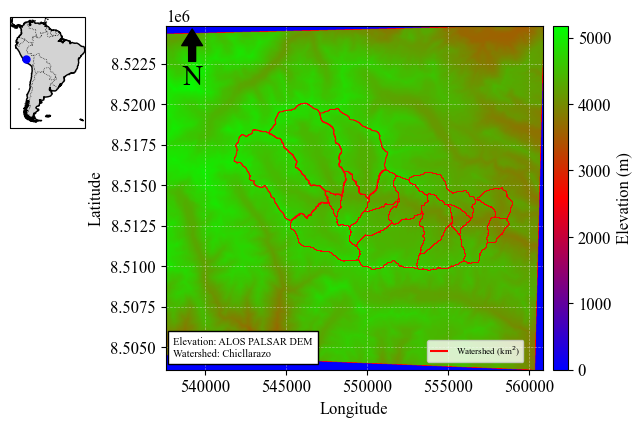

In [15]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Circle, Rectangle
from matplotlib_scalebar.scalebar import ScaleBar
import cartopy.feature as cfeature

from matplotlib import rcParams as rc
rc['font.family'] = 'serif'
rc['font.serif'] = ['Times New Roman']
rc['font.size'] = 12
rc['text.usetex'] = False

# Cargar los datos del raster con rasterio
# Reemplaza 'ruta_del_archivo.tif' con la ruta de tu archivo raster
with rasterio.open('D:/L/More/dem/Dem-Study/Dem.tif') as src:
    data = src.read(1)
    transform = src.transform  # Guardamos la transformación para usarla después

# Cargar el archivo shapefile con geopandas
# Reemplaza 'ruta_del_shapefile.shp' con la ruta de tu archivo shapefile
shp_file = 'D:/L/More/shp/Chicllarazo-wg84.shp'
#D:\T_JONA\TESIS_PISCO\point_dem84.shp
#shp_file1 = 'D:/T_JONA/TESIS_PISCO/estac_clima84.shp'
gdf = gpd.read_file(shp_file)
#gdf1 = gpd.read_file(shp_file1)
# Reproyectar el shapefile para que coincida con el sistema de coordenadas del raster
gdf = gdf.to_crs(src.crs)
#gdf1 = gdf1.to_crs(src.crs)

# Cargar el segundo shapefile
#shp_file2 = 'D:/T_JONA/red_amazonas/point_station.geojson'  # Reemplaza con la ruta de tu segundo shapefile
#gdf2 = gpd.read_file(shp_file2)
#gdf2 = gdf2.to_crs(src.crs)

# Plotar o gráfico com a escala "terrain"
fig, ax = plt.subplots(1, 1, figsize=(9.47, 4.47))

# Plotar o raster com o rasterio.show() e integração com o plt
img = plt.imshow(data, cmap="brg", extent=(src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top))

# Plotar el raster con el rasterio.show() y la integración con el plt
#plt.colorbar(img, label="Elevation (m)", location='left', pad=0.05,aspect=35)#, agregar esala shrink=0.7

# Plotar el shapefile en el mismo gráfico
gdf.boundary.plot(ax=ax, color='red', linewidth=.7, label=r'Watershed (km$^2$)')
#gdf2.plot(ax=ax, color='blue', marker='o', markersize=10, label='Virtual Stations')
#ax.legend(loc='lower center', bbox_to_anchor=(0.82, 0.01), ncol=1, fontsize='6.5')
legend = ax.legend(loc='lower center', bbox_to_anchor=(0.82, 0.01), ncol=1, fontsize='6.5')
for line in legend.get_lines():
    line.set_linewidth(1.5)

# Calcular el centro y tamaño del cuadrado
cuadrado_centro = (-74.33, -13.27)  # Latitud, longitud
cuadrado_lado = 1.0  # Tamaño del cuadrado en grados

# Agregar un cuadrado en una posición específica
square = Rectangle((cuadrado_centro[0] - cuadrado_lado/2, cuadrado_centro[1] - cuadrado_lado/2),cuadrado_lado, 
                   cuadrado_lado, color='blue', fill=False, linestyle='dashed', linewidth=1.5)
ax.add_patch(square)

# Personalizar rótulos e título do gráfico
plt.xlabel('Longitude') #xlable which is long
plt.ylabel('Latitude') #ylable which is lat
plt.title("")

#scalebar
# Modificando el scalebar para kilómetros
#scalebar = ScaleBar(0.8 * 0.001, "km", dimension="si-length", length_fraction=0.10, location="lower right")
#ax.add_artist(scalebar)

# Inserindo grids
ax.grid(color='0.95', linestyle='dashed', linewidth=0.5, alpha=0.5)

# Calcular los límites del shapefile
shp_min_lon, shp_min_lat, shp_max_lon, shp_max_lat = gdf.bounds.iloc[0]

# Plotar box de informações
info_box_text = ('Elevation: ALOS PALSAR DEM\n'
                 'Watershed: Chicllarazo')
ax.text(0.02, 0.039, info_box_text, transform=ax.transAxes, fontsize=7.5, bbox=dict(facecolor='white'))

# Vamos adicionar o norte
x, y, arrow_length = 0.07, 0.99, 0.14
# Usando uma anotação de x e y
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

# Añadir el mapa de América del Sur como un inserto

ax_inset = plt.axes([0.05, 0.65, 0.25, 0.25], projection=ccrs.PlateCarree()) 
ax_inset.set_extent([-85, -35, -60, 15], crs=ccrs.PlateCarree())  # Extensión de América del Sur
ax_inset.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax_inset.add_feature(cfeature.COASTLINE)
ax_inset.add_feature(cfeature.LAND, color='lightgray')

# Añadir límites de la cuenca en el inserto
#gdf.boundary.plot(ax=ax_inset, transform=ccrs.PlateCarree(), color='red', linewidth=1)

# Añadir una marca de localización en el inserto
ax_inset.plot(cuadrado_centro[0], cuadrado_centro[1], 'bo', markersize=5, transform=ccrs.PlateCarree())



from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.1)
cbar = plt.colorbar(img, cax=cax)
cbar.set_label('Elevation (m)')
    

# Salvando a figura como jpeg
#plt.savefig('D:/A/Mapa de Elevación con Shapefile.jpg', dpi=300, bbox_inches='tight')
#os.path.join(plots_dir, 'Mapa de Elevación con Shapefile.jpg')
# Mostrar el gráfico en pantalla

plt.show()

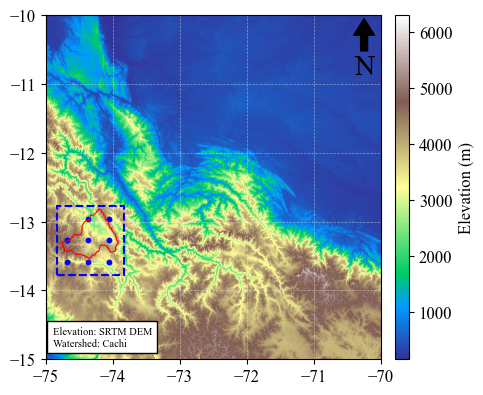

In [7]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Configurar la fuente y el tamaño de la fuente para los gráficos de Matplotlib
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})  # Puedes ajustar el tamaño según lo necesites

# Cargar los datos del raster con rasterio
with rasterio.open('D:/QSWAT/Example_UNSCH/srtm/srtm_22_15.tif') as src:
    data = src.read(1)
    transform = src.transform  # Guardamos la transformación para usarla después

# Cargar el archivo shapefile con geopandas
shp_file = 'D:/T_JONA/TESIS_PISCO/cachi_wg84_R.shp'
gdf = gpd.read_file(shp_file)
gdf = gdf.to_crs(src.crs)

# Cargar el segundo shapefile
shp_file2 = 'D:/T_JONA/red_amazonas/point_station.geojson'
gdf2 = gpd.read_file(shp_file2)
gdf2 = gdf2.to_crs(src.crs)

# Plotar el gráfico con la escala "terrain"
fig, ax = plt.subplots(1, 1, figsize=(9.47, 4.47))

# Mostrar el raster
img = ax.imshow(data, cmap="terrain", extent=(src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top))

# Plotear los shapefiles en el mismo gráfico
gdf.boundary.plot(ax=ax, color='red', linewidth=.7, label=r'Watershed (km$^2$)')
gdf2.plot(ax=ax, color='blue', marker='o', markersize=10, label='Virtual Stations')

# Agregar un cuadrado en una posición específica
cuadrado_centro = (-74.33, -13.27)  # Latitud, longitud
cuadrado_lado = 1.0  # Tamaño del cuadrado en grados
square = Rectangle((cuadrado_centro[0] - cuadrado_lado/2, cuadrado_centro[1] - cuadrado_lado/2), cuadrado_lado, 
                   cuadrado_lado, color='blue', fill=False, linestyle='dashed', linewidth=1.5)
ax.add_patch(square)

# Personalizar rótulos y título del gráfico
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("")

# Agregar grids
ax.grid(color='0.95', linestyle='dashed', linewidth=0.5, alpha=0.5)

# Calcular los límites del shapefile
shp_min_lon, shp_min_lat, shp_max_lon, shp_max_lat = gdf.bounds.iloc[0]

# Plotar caja de información
info_box_text = ('Elevation: SRTM DEM\n'
                 'Watershed: Cachi')
ax.text(0.02, 0.039, info_box_text, transform=ax.transAxes, fontsize=7.5, bbox=dict(facecolor='white'))

# Agregar indicador de norte
x, y, arrow_length = 0.95, 0.99, 0.14
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

# Añadir barra de color
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.1)
cbar = plt.colorbar(img, cax=cax)
cbar.set_label('Elevation (m)')

# Mostrar el gráfico
plt.show()



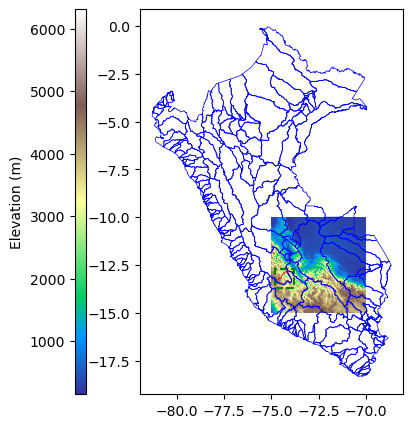

In [5]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Cargar los datos del raster con rasterio
with rasterio.open('D:/QSWAT/Example_UNSCH/srtm/srtm_22_15.tif') as src:
    data = src.read(1)
    transform = src.transform  # Guardamos la transformación para usarla después

# Cargar el primer shapefile con geopandas
shp_file1 = 'D:/T_JONA/TESIS_PISCO/cachi_wg84_R.shp'
gdf1 = gpd.read_file(shp_file1)
gdf1 = gdf1.to_crs(src.crs)

# Cargar el segundo shapefile
shp_file2 = 'D:/T_JONA/red_amazonas/UH.shp'  # Reemplaza con la ruta de tu segundo shapefile
gdf2 = gpd.read_file(shp_file2)
gdf2 = gdf2.to_crs(src.crs)

# Plotar el gráfico
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

# Plotar el raster
img = plt.imshow(data, cmap="terrain", extent=(src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top))
plt.colorbar(img, label="Elevation (m)", location='left', pad=0.05, aspect=35)

# Plotar los shapefiles
gdf1.boundary.plot(ax=ax, color='red', linewidth=.5, label='Shapefile 1 Boundary')
gdf2.boundary.plot(ax=ax, color='blue', linewidth=.5, label='Shapefile 2 Boundary')

# Calcular el centro y tamaño del cuadrado
cuadrado_centro = (-74.31, -13.2)  # Latitud, longitud
cuadrado_lado = 1.0  # Tamaño del cuadrado en grados

# Agregar un cuadrado en una posición específica
square = Rectangle((cuadrado_centro[0] - cuadrado_lado/2, cuadrado_centro[1] - cuadrado_lado/2), cuadrado_lado, cuadrado_lado, 
                   color='green', fill=False, linestyle='dashed', linewidth=1.5)
ax.add_patch(square)

# Ajustar el resto del gráfico según tus necesidades

# Mostrar el gráfico en pantalla
plt.show()


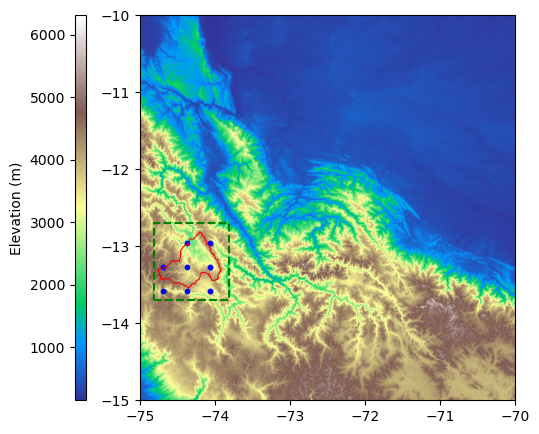

In [23]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Cargar los datos del raster con rasterio
with rasterio.open('D:/QSWAT/Example_UNSCH/srtm/srtm_22_15.tif') as src:
    data = src.read(1)
    transform = src.transform  # Guardamos la transformación para usarla después

# Cargar el primer shapefile con geopandas
shp_file1 = 'D:/T_JONA/TESIS_PISCO/cachi_wg84_R.shp'
gdf1 = gpd.read_file(shp_file1)
gdf1 = gdf1.to_crs(src.crs)

# Cargar el segundo shapefile
shp_file2 = 'D:/T_JONA/red_amazonas/point_station.geojson'  # Reemplaza con la ruta de tu segundo shapefile
gdf2 = gpd.read_file(shp_file2)
gdf2 = gdf2.to_crs(src.crs)

# Plotar el gráfico
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

# Plotar el raster
img = plt.imshow(data, cmap="terrain", extent=(src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top))
plt.colorbar(img, label="Elevation (m)", location='left', pad=0.05, aspect=35)

# Plotar los shapefiles
gdf1.boundary.plot(ax=ax, color='red', linewidth=.7, label='Shapefile 1 Boundary')
gdf2.plot(ax=ax, color='blue', marker='o', markersize=10, label='Puntos')

# Calcular el centro y tamaño del cuadrado
cuadrado_centro = (-74.31, -13.2)  # Latitud, longitud
cuadrado_lado = 1.0  # Tamaño del cuadrado en grados

# Agregar un cuadrado en una posición específica
square = Rectangle((cuadrado_centro[0] - cuadrado_lado/2, cuadrado_centro[1] - cuadrado_lado/2), cuadrado_lado, cuadrado_lado, 
                   color='green', fill=False, linestyle='dashed', linewidth=1.5)
ax.add_patch(square)

# Ajustar el resto del gráfico según tus necesidades

# Mostrar el gráfico en pantalla
plt.show()

In [12]:
import geopandas as gpd
import cartopy
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from mpl_toolkits.axes_grid.inset_locator import InsetPosition
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import numpy as np
from pyproj import Proj, transform
import matplotlib.pyplot as plt


NameError: name 'LONGITUDE_FORMATTER' is not defined

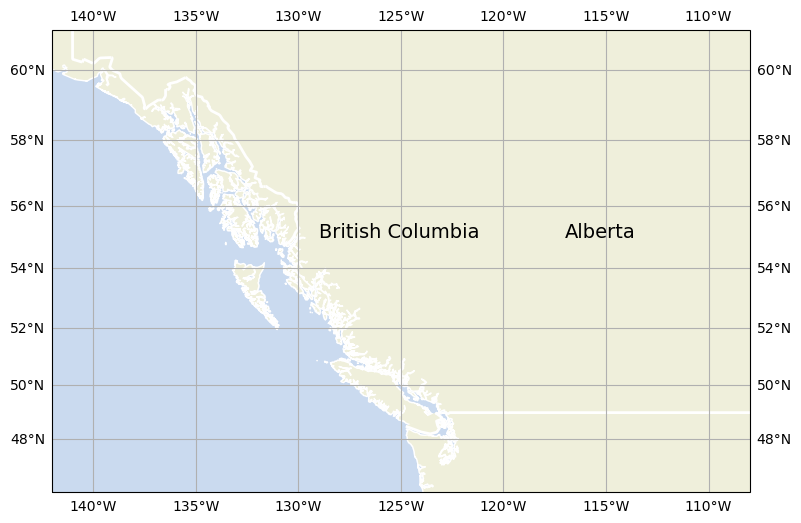

In [4]:
#Make map of study region

#save the figure (1 = save, 0 = don't save)
saveIt = 0
saveEPS = 0

##### plot closeup

ocean = cfeature.NaturalEarthFeature(
    'physical',
    'ocean',
    '10m',
    edgecolor='w',
    alpha = 0.5,
    facecolor=cfeature.COLORS['water'],
    linewidth = 1
)

borders = cfeature.NaturalEarthFeature(
    'cultural',
    'admin_0_boundary_lines_land',
    '10m',
    edgecolor='w',
    facecolor=cfeature.COLORS['land'],
    linewidth = 2
)

coasts = cfeature.GSHHSFeature(
    scale = 'intermediate',
    levels = [1],
    facecolor = cfeature.COLORS['land'],
    alpha = 1.,
    edgecolor = 'w',
    linewidth = 1
)

fig = plt.figure(figsize=(9,6))

canada_east = -108
canada_west = -142
canada_north = 60
canada_south = 46
xy_text_bc = [-129, 55]
xy_text_ab = [-117, 55]
ax1 = fig.add_subplot(1,1,1,projection=ccrs.Mercator(), aspect = 'auto')
ax1.set_extent([canada_west,canada_east,canada_south,canada_north])
ax1.add_feature(ocean)
ax1.add_feature(coasts)
ax1.add_feature(borders)
ax1.text(x = xy_text_bc[0], y = xy_text_bc[1], s = 'British Columbia', transform = ccrs.PlateCarree(), fontsize = 14)
ax1.text(x = xy_text_ab[0], y = xy_text_ab[1], s = 'Alberta', transform = ccrs.PlateCarree(), fontsize = 14)
gl = ax1.gridlines(draw_labels = True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(-150,-100,5))
gl.ylocator = mticker.FixedLocator(np.arange(40,70,2))
gl.xlabel_style = {'size' : 12}
gl.ylabel_style = {'size' : 12}
gl.xlabels_top = False
gl.ylabels_left = False
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', transform=ax1.transAxes, fontsize = 20)
ax1.text(0.5, -0.12, 'Longitude', va='bottom', ha='center', rotation='horizontal', rotation_mode='anchor', transform=ax1.transAxes, fontsize = 20)
plt.title('Study Region', y = 1.02, fontsize = 20)

#plot provincial boundaries
# provshapes_filename = './Data/PROVINCE.SHP'
# provshapes_filename = './Data/province/province.shp'
provshapes_filename = './Data/province_borders/lpr_000b16a_e.shp'
provshapes = gpd.read_file(provshapes_filename)
inProj = Proj(init = 'epsg:3347') #manually reproject from Lambert Conformal Conic
outProj = Proj(init='epsg:4326') #to WGS84 (latitude/longitude)
for provIndex in [8,9]:#[0,11]:
    
    provPoly = provshapes['geometry'][provIndex] #polygon(s) of province

    if len(np.shape(provPoly)) == 0: #if only one polygon to plot

        lonBorder,latBorder = provPoly.exterior.coords.xy 
        lonBorder,latBorder = transform(inProj, outProj, lonBorder, latBorder)
        ax1.plot(lonBorder,latBorder,'gray', transform = ccrs.PlateCarree(), linewidth = 1)

    else: #if multiply polygons in shape to plot

        for ind in range(len(provPoly)):

            lonBorder_segment,latBorder_segment = provPoly[ind].exterior.coords.xy 
            lonBorder_segment,latBorder_segment = transform(inProj, outProj, lonBorder_segment, latBorder_segment)
            ax1.plot(lonBorder_segment,latBorder_segment,'gray', transform = ccrs.PlateCarree(), linewidth = 1)

#bounding box
x = [-133,-133,-110,-110,-133]
y = [48,56,56,48,48]
ax1.plot(x,y, 'k', transform = ccrs.PlateCarree(), linewidth = 3)

##### plot zoomout

ocean = cfeature.NaturalEarthFeature(
    'physical',
    'ocean',
    '110m',
    edgecolor='w',
    alpha = 0.5,
    facecolor=cfeature.COLORS['water'],
    linewidth = 1)

borders = cfeature.NaturalEarthFeature(
    'cultural',
    'admin_0_boundary_lines_land',
    '110m',
    edgecolor='w',
    facecolor=cfeature.COLORS['land'],
    linewidth = 2)

coasts = cfeature.GSHHSFeature(
    scale = 'coarse',
    levels = [1],
    facecolor = cfeature.COLORS['land'],
    edgecolor = 'w',
    linewidth = 1)

canada_east = -60
canada_west = -170
canada_north = 60
canada_south = 30
ax2 = plt.axes([0,0,1,1], projection = ccrs.Mercator(), aspect = 'auto')
ip = InsetPosition(ax1, [0.7,0.7,0.25,0.25])
ax2.set_axes_locator(ip)
ax2.set_extent([canada_west,canada_east,canada_south,canada_north])
ax2.add_feature(ocean)
ax2.add_feature(coasts)
ax2.add_feature(borders)

#bounding box
x = [-133,-133,-110,-110,-133]
y = [48,56,56,48,48]
ax2.plot(x,y, 'k', transform = ccrs.PlateCarree(), linewidth = 2)

if saveIt:
    filedir = '/Users/samanderson/repos/cnn_lstm_era/Figures/'
    filename = 'study_region.png'
    plt.savefig(filedir + filename, dpi=300,bbox_inches='tight')
   
if saveEPS:
    filedir = '/Users/samanderson/repos/cnn_lstm_era/Figures/'
    filename = 'study_region.eps'
    plt.savefig(filedir + filename, format = 'eps', bbox_inches='tight')

plt.show()

In [19]:
############################bbox##############################################
import rioxarray
# download soil depth data
soil_raster = rioxarray.open_rasterio("https://files.isric.org/soilgrids/former/2017-03-10/data/BDRICM_M_250m_ll.tif")
soil_depth_data = soil_raster.rio.clip_box(
    minx=-75,
    miny=-15,
    maxx=-70,
    maxy=-10,
)

Text(0.5, 1.0, 'Soil Depth')

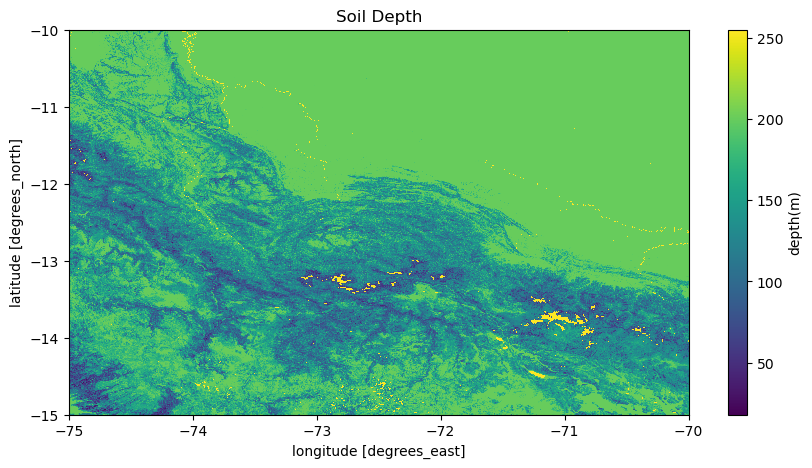

In [20]:
# plot soil depth data
soil_depth_data.plot(figsize=(10,5),cbar_kwargs={'label': 'depth(m)'})
soil_depth_data.rio.to_raster(os.path.join(plots_dir,'soil_.tif'))
plt.title('Soil Depth')

In [3]:
path_vec_hma = 'D:/T_JONA/TESIS_PISCO/cachi_wg84_R.shp'
geodf_vec_hma = gpd.read_file(path_vec_hma)
geodf_vec_hma

,ID,GRIDCODE,geometry
0,1,0,"POLYGON ((-74.35605 -13.54244, -74.35826 -13.5..."


In [2]:
# hma_bounds = ([75, 76, 34, 35])  ### west, east, south, north
lonmin, lonmax = 60, 110
latmin, latmax = 20, 50
for lon in range(lonmin, lonmax, 5):    
    for lat in range(latmin, latmax, 5):        
        dem_out = 'dem/tiles/SRTMGL3_{}_{}.tif'.format(lon, lat)
        region = [lon-0.1, lon+5+0.1, lat-0.1, lat+5+0.1]
        print('Ouput dem:', dem_out, 'Region:',  region)
        # get_dem(demtype='SRTMGL3', bounds=region, path_out=dem_out)

Ouput dem: dem/tiles/SRTMGL3_60_20.tif Region: [59.9, 65.1, 19.9, 25.1]
Ouput dem: dem/tiles/SRTMGL3_60_25.tif Region: [59.9, 65.1, 24.9, 30.1]
Ouput dem: dem/tiles/SRTMGL3_60_30.tif Region: [59.9, 65.1, 29.9, 35.1]
Ouput dem: dem/tiles/SRTMGL3_60_35.tif Region: [59.9, 65.1, 34.9, 40.1]
Ouput dem: dem/tiles/SRTMGL3_60_40.tif Region: [59.9, 65.1, 39.9, 45.1]
Ouput dem: dem/tiles/SRTMGL3_60_45.tif Region: [59.9, 65.1, 44.9, 50.1]
Ouput dem: dem/tiles/SRTMGL3_65_20.tif Region: [64.9, 70.1, 19.9, 25.1]
Ouput dem: dem/tiles/SRTMGL3_65_25.tif Region: [64.9, 70.1, 24.9, 30.1]
Ouput dem: dem/tiles/SRTMGL3_65_30.tif Region: [64.9, 70.1, 29.9, 35.1]
Ouput dem: dem/tiles/SRTMGL3_65_35.tif Region: [64.9, 70.1, 34.9, 40.1]
Ouput dem: dem/tiles/SRTMGL3_65_40.tif Region: [64.9, 70.1, 39.9, 45.1]
Ouput dem: dem/tiles/SRTMGL3_65_45.tif Region: [64.9, 70.1, 44.9, 50.1]
Ouput dem: dem/tiles/SRTMGL3_70_20.tif Region: [69.9, 75.1, 19.9, 25.1]
Ouput dem: dem/tiles/SRTMGL3_70_25.tif Region: [69.9, 75.1, 24.9

In [5]:
srtm_down = readTiff(path_srtm_down)
cmap = plt.cm.terrain
plt.figure(figsize=(8, 7))
plt.subplot(1,1,1)
plt.title('downsampled SRTM data')
plt.imshow(srtm_down.array, cmap=cmap, clim=[0, 8000], alpha=1, extent=srtm_down.geoextent)
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)', shrink=0.65)

In [ ]:
# https://github.com/lou-a/Quick_Start_Basin_Delineation_Pysheds         